# Global Housing Trends: Exploratory & Interactive Visualizations

In [25]:
import pandas as pd

df = pd.read_csv("global_housing_market_extended.csv")
df.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


# Data Understanding and Cleaning

#### 1. Objective: Understand the dataset and clean it for analysis.
* A. View the first rows.
* B. Datatypes & structure
* C. Columns of interest
* D. Null Values

#### A. View the First Rows

##### The data set is already loaded, so use the code below {df.head} to showcase the first few rows.

In [26]:
df.head() 

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


#### B. Data Types & Structure

This tells you which:
* which columns are numeric
* which columns are object/string
* whether any columns need converting

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.3+ KB


#### C. View Summary Statistics (numeric only)

##### This code df.describe() helps you see outliers, weird negatives, incorrect values, etc.

In [28]:
df.describe()

,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2019.500000,130.381022,83.048370,7.237768,4.150621,3.649756,2.133722,0.722806,74.769891,111.204257
std,2.879489,28.752229,21.439858,2.576085,1.380222,1.881938,2.413270,1.035691,8.734246,24.309473
min,2015.000000,80.552212,50.354311,3.041688,1.537814,0.532110,-1.921833,-0.961391,60.172760,70.968678
25%,2017.000000,104.142562,60.466671,5.034207,3.045278,1.939199,-0.095628,-0.183320,66.923842,90.182198
50%,2019.500000,129.193653,83.721711,7.375697,4.329643,3.664625,2.307548,0.722372,75.100060,110.593807
75%,2022.000000,157.127098,100.604665,9.276196,5.217706,5.261720,4.272776,1.621317,82.677430,133.780445
max,2024.000000,179.971767,119.855388,11.879671,6.485623,6.912349,5.958931,2.497948,89.788944,149.735748


#### D. Check for Null (missing) Values:

##### This code df.isnull().sum() will tell you which columns need cleaning.

In [29]:
df.isnull().sum()

Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64

###### Documentation:
* <small>All columns show 0 missing values, so no imputation is required.</small> 
* <small>The dataset is fully complete, which simplifies the cleaning process.</small>  

##  1b. Cleaning Requirements:
* E. Handle Missing Values Appropriately. 
* F. Rename or Standardize Column Names if Necessary
* G. Check for Duplicates and Remove them.
* H. Convert 'Year' to Categorical if Needed.
* I. Ensure numeric columns are valid (e.g., Rent-to-Income ratio, Price-to-Income multiplier) if added.
* J. Group Years into Intervals (if needed).

#### E. Handle Missing Values Appropriately.

In [30]:
# Check for missing values
df.isnull().sum()

Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64

##### No missing values were found in any column, so no imputation is required. Dataset is complete and ready for analysis.

#### F. Rename or Standardize Column Names if Necessary

###### Documentation
* <small>Additional cleaning step applied using <code>df.columns = df.columns.str.replace('[()%]', '', regex=True)</code> to remove parentheses and percent symbols from column names.</small>  
* <small>Removing these special characters prevents issues when accessing columns in formulas, visualizations, or attribute-style references.</small>  
* <small>This step ensures that all column names remain clean, consistent, and fully compatible with Python and common data-science libraries.</small>

In [31]:
# Standardize column names: lowercase, no spaces, consistent formatting
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)
# Remove special characters like parentheses and percent signs 
# Standardized names make the dataset easier to work with and avoid errors.
df.columns = df.columns.str.replace('[()%]', '', regex=True)

# Display updated column names to verify the change
df.columns

Index(['country', 'year', 'house_price_index', 'rent_index',
       'affordability_ratio', 'mortgage_rate_', 'inflation_rate_',
       'gdp_growth_', 'population_growth_', 'urbanization_rate_',
       'construction_index'],
      dtype='object')

#### G. Check for Duplicates and Remove them:

In [32]:
# Check number of duplicate rows
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

###### Documentation
* <small>Checked for duplicate rows using <code>df.duplicated().sum()</code> to identify any repeated records.</small>  
* <small>The output returned <code>0</code> (a <code>np.int64</code> value), indicating that the dataset contains no duplicate entries.</small>  
* <small>Since no duplicates were detected, no rows needed to be removed.</small>

#### H. Convert 'Year' to Categorical if Needed

###### Documentation
* <small>Used <code>df['year'].astype('category')</code> to convert the <code>year</code> column from an integer type into a categorical type.</small>  
* <small>This ensures that years are treated as discrete labels rather than continuous numeric values, which is more appropriate for temporal grouping and analysis.</small>  
* <small>Verified the change by checking the dtype output, which confirmed that <code>year</code> is now stored as a <code>CategoricalDtype</code>.</small>

In [33]:
df['year'] = df['year'].astype('category')
df['year'].dtype

CategoricalDtype(categories=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], ordered=False, categories_dtype=int64)

#### I. Ensure Numeric Columns Are Valid (especially if adding ratios)

###### Documentation
* <small>Used a <code>for</code>-loop with <code>pd.to_numeric()</code> inside a <code>try/except</code> block to convert each column to a numeric type where possible, replacing the deprecated <code>errors='ignore'</code> approach.</small>  
* <small>This ensured that all numeric fields were stored correctly as numbers, enabling accurate calculations and visualizations.</small>  
* <small>Verified the conversion using <code>df.dtypes</code>, which showed that economic indicators (e.g., <code>house_price_index</code>, <code>rent_index</code>, <code>affordability_ratio</code>, <code>mortgage_rate_</code>, <code>inflation_rate_</code>, <code>gdp_growth_</code>, <code>population_growth_</code>, <code>urbanization_rate_</code>, <code>construction_index</code>) were successfully converted to <code>float64</code>.</small>  
* <small>Confirmed that non-numeric fields like <code>country</code> remained as <code>object</code>, and <code>year</code> remained as <code>int64</code>, which is appropriate for analysis.</small>

In [34]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass 
        # Check the data types after numeric conversion
df.dtypes


country                 object
year                     int64
house_price_index      float64
rent_index             float64
affordability_ratio    float64
mortgage_rate_         float64
inflation_rate_        float64
gdp_growth_            float64
population_growth_     float64
urbanization_rate_     float64
construction_index     float64
dtype: object

#### J. Group Years into Intervals (if needed)

In [35]:
df['year_interval'] = df['year'].astype(int)

df['year_interval'] = pd.cut(
    df['year_interval'],
    bins=[2014, 2019, 2024],
    labels=['2015-2019', '2020-2024']
)

df[['year', 'year_interval']].head()


,year,year_interval
0,2015,2015-2019
1,2016,2015-2019
2,2017,2015-2019
3,2018,2015-2019
4,2019,2015-2019


###### Documentation
* <small>Converted the 'year' column into integers using <code>df['year'].astype(int)</code> to prepare it for binning into intervals.</small>  
* <small>Used <code>pd.cut()</code> with custom bins (<code>[2014, 2019, 2024]</code>) to group years into two intervals: '2015–2019' and '2020–2024'.</small>  
* <small>This created a new categorical column <code>'year_interval'</code> that simplifies comparison of economic trends across early and later time periods.</small>  
* <small>Verified the transformation by displaying the first few rows with <code>df[['year', 'year_interval']].head()</code>.</small>

# 2. EXPLORATORY DATA ANALYSIS 

#### 2. Perform the Following Inital Analysis:
* A. Understand the Structure and Summary Statistics.
* B. Count of Countries and year range.
* C. Summary of affordability and housing indicators.
* D. Identify any temporal or reigonal anomalies.

#### A. Understand Structure & Summary Statistics.

###### Documentation
* <small>Used <code>df.info()</code> to examine the overall structure of the dataset, including column types and non-null counts.</small>  
* <small>This confirmed that all columns loaded correctly and contained complete data.</small>  
* <small>Used <code>df.describe()</code> to generate summary statistics for the numeric indicators.</small>  
* <small>This helped identify value ranges, central tendencies, and potential outliers in key housing and economic variables.</small>


In [36]:
# Look at the overall structure of the dataset
df.info()

# Summary statistics for key numeric indicators
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   country              200 non-null    object  
 1   year                 200 non-null    int64   
 2   house_price_index    200 non-null    float64 
 3   rent_index           200 non-null    float64 
 4   affordability_ratio  200 non-null    float64 
 5   mortgage_rate_       200 non-null    float64 
 6   inflation_rate_      200 non-null    float64 
 7   gdp_growth_          200 non-null    float64 
 8   population_growth_   200 non-null    float64 
 9   urbanization_rate_   200 non-null    float64 
 10  construction_index   200 non-null    float64 
 11  year_interval        200 non-null    category
dtypes: category(1), float64(9), int64(1), object(1)
memory usage: 17.6+ KB


,year,house_price_index,rent_index,affordability_ratio,mortgage_rate_,inflation_rate_,gdp_growth_,population_growth_,urbanization_rate_,construction_index
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2019.500000,130.381022,83.048370,7.237768,4.150621,3.649756,2.133722,0.722806,74.769891,111.204257
std,2.879489,28.752229,21.439858,2.576085,1.380222,1.881938,2.413270,1.035691,8.734246,24.309473
min,2015.000000,80.552212,50.354311,3.041688,1.537814,0.532110,-1.921833,-0.961391,60.172760,70.968678
25%,2017.000000,104.142562,60.466671,5.034207,3.045278,1.939199,-0.095628,-0.183320,66.923842,90.182198
50%,2019.500000,129.193653,83.721711,7.375697,4.329643,3.664625,2.307548,0.722372,75.100060,110.593807
75%,2022.000000,157.127098,100.604665,9.276196,5.217706,5.261720,4.272776,1.621317,82.677430,133.780445
max,2024.000000,179.971767,119.855388,11.879671,6.485623,6.912349,5.958931,2.497948,89.788944,149.735748


#### B. Count of Countries and Year Range 

###### Documentation
* <small>Used <code>df['country'].nunique()</code> to count the number of unique countries represented in the dataset.</small>  
* <small>The output returned <code>20</code>, indicating the dataset includes housing and economic data from 20 different countries.</small>  
* <small>Used <code>df['year'].min()</code> and <code>df['year'].max()</code> to identify the temporal range of the dataset.</small>  
* <small>The results showed a range from <code>2015</code> to <code>2024</code>, confirming that the dataset covers a full decade of housing trends.</small>

In [37]:
# Number of unique countries
num_countries = df['country'].nunique()
num_countries

20

In [38]:
# Year range in the dataset
df['year'].min(), df['year'].max()

(2015, 2024)

#### C. Summary of Affordability & Housing Indicators

###### Documentation
* <small>Used <code>df[['house_price_index', 'rent_index', 'affordability_ratio', 'mortgage_rate_', 'inflation_rate_', 'gdp_growth_']].describe()</code> to generate summary statistics for major housing and economic indicators.</small>  
* <small>The descriptive statistics helped identify average values, variability, and the overall distribution of key variables such as housing prices, rent levels, and affordability.</small>  
* <small>Reviewed minimum, maximum, and quartile values to detect any unusually high or low observations that may indicate anomalies or noteworthy patterns.</small>  
* <small>This summary provides a foundational understanding of the general behavior of housing and affordability indicators across all countries and years.</small>

In [39]:
# Summary of key housing variables
df[['house_price_index', 'rent_index', 'affordability_ratio',
    'mortgage_rate_', 'inflation_rate_', 'gdp_growth_']].describe()

,house_price_index,rent_index,affordability_ratio,mortgage_rate_,inflation_rate_,gdp_growth_
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,130.381022,83.048370,7.237768,4.150621,3.649756,2.133722
std,28.752229,21.439858,2.576085,1.380222,1.881938,2.413270
min,80.552212,50.354311,3.041688,1.537814,0.532110,-1.921833
25%,104.142562,60.466671,5.034207,3.045278,1.939199,-0.095628
50%,129.193653,83.721711,7.375697,4.329643,3.664625,2.307548
75%,157.127098,100.604665,9.276196,5.217706,5.261720,4.272776
max,179.971767,119.855388,11.879671,6.485623,6.912349,5.958931


#### D. Identify Temporal Anomalies (trends over time)

###### Documentation
* <small>Used <code>df.groupby('year')</code> to calculate yearly averages for key indicators such as house prices, rent index, affordability ratio, mortgage rates, inflation, and GDP growth.</small>  
* <small>This approach helps identify temporal patterns by showing how housing and economic metrics shift from 2015 to 2024.</small>  
* <small>The resulting table highlights potential anomalies, such as noticeable increases in housing prices or abrupt changes in inflation or GDP growth in specific years.</small>  
* <small>These trends provide insight into broader economic conditions and help detect years that deviate from expected patterns.</small>

In [40]:
# Group by year to inspect average trends
yearly_trends = df.groupby('year')[['house_price_index', 'rent_index',
                                    'affordability_ratio', 'mortgage_rate_',
                                    'inflation_rate_', 'gdp_growth_']].mean()
yearly_trends

,house_price_index,rent_index,affordability_ratio,mortgage_rate_,inflation_rate_,gdp_growth_
year,,,,,,
2015,139.227551,86.065883,7.537018,4.723684,3.520285,1.911071
2016,120.354279,82.038687,7.305771,4.392503,3.589203,2.180306
2017,130.374609,85.666517,6.680388,4.055324,4.057433,2.449061
2018,127.793459,95.911099,6.775520,3.847710,3.973904,2.237369
2019,123.056015,85.336782,7.982999,4.201771,2.931017,2.164606
2020,132.257842,76.429322,7.623159,3.996959,3.863103,2.200618
2021,142.144052,81.627154,7.439316,3.491795,3.702235,1.872846
2022,120.314413,76.633595,7.431316,4.135933,4.145811,1.906202
2023,130.116069,79.526352,7.107712,4.588066,3.043104,1.656822


#### E. Identify Regional Anomalies (country-level issues)

###### Documentation
* <small>Used <code>df.groupby('country')</code> to compute country-level averages for key indicators including <code>house_price_index</code>, <code>rent_index</code>, and <code>affordability_ratio</code>.</small>  
* <small>This aggregation highlights regional differences by showing how housing prices and affordability vary across countries.</small>  
* <small>The resulting table helps identify regional anomalies, such as countries with unusually high housing prices (e.g., Switzerland, UAE) or unusually low affordability (e.g., India, South Africa).</small>  
* <small>These country-level patterns provide insight into which regions deviate significantly from global averages and may require deeper investigation.</small>

In [41]:
# Country-level summary for affordability and housing indicators
regional_summary = df.groupby('country')[['house_price_index', 'rent_index',
                                          'affordability_ratio']].mean()
regional_summary

,house_price_index,rent_index,affordability_ratio
country,,,
Australia,135.752524,75.269638,6.359994
Brazil,143.080085,88.799770,5.822374
Canada,112.084824,86.148975,6.694199
China,123.808752,86.591358,6.122026
France,139.344904,75.032904,6.114604
Germany,134.204203,88.655377,6.101326
India,130.760657,81.108650,7.951057
Italy,135.926407,88.637664,7.471097
Japan,122.337556,74.044817,6.217082


# SECTION 2: DATA VISUALIZATION 

In [2]:
import pandas as pd

df = pd.read_csv("global_housing_market_extended.csv")
df.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


In [4]:
import os
os.listdir()


['DATA VISUALIZATION.ipynb',
 'world_map',
 '2_DT_Visualization.ipynb',
 'global_housing_EDA.ipynb',
 '.ipynb_checkpoints',
 'global_housing_market_extended.csv',
 'world.zip',
 'GEOMAPSEDA.ipynb']

In [5]:
import pandas as pd

df = pd.read_csv("global_housing_market_extended.csv")
df.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.3+ KB


# 3. DATA VISUALIZATION AND INTERPRETATION: 
###### Include a heatmap to understand the correlation analysis with the following core visualizations: 
### Perform the Following initial analysis:
* A. Avg. House Price Index by Country (Bar Plot, Seaborn/Matplotlib)
* B. Mortgage Rate Distribution (Understand Rate Spread) (Histogram, Seaborn/Mapplotlib)
* C. House Price vs. Rent Index (explore affordability) (Scatter plot, Seaborn/Matplotlib)
* D. Affordability Ratio Over time (track global/reigonal trend) (Line plot, Seaborn/Matplotlib)
* E. Avg. House Price Index by Country (Goegraphic Insight) (Geo map)
* F. Include a Heatmap to understand the correlation analysis with the following core visualizations.
* G. Optional Matplot Lib Visualization

##### Requirement: Each Plot should be accompanied by 
* A proper title, axis labels, and legend.
* Interpretation: Summarizing patterns or anomalies.
* Customize fonts and visual themes for readability.

# 3A. Visualization: Average House Price Index by Country (Barplot)
* Purpose: Compare Top Countries 
* Tools Suggested: Barplot (Seaborn/Matplotlib)

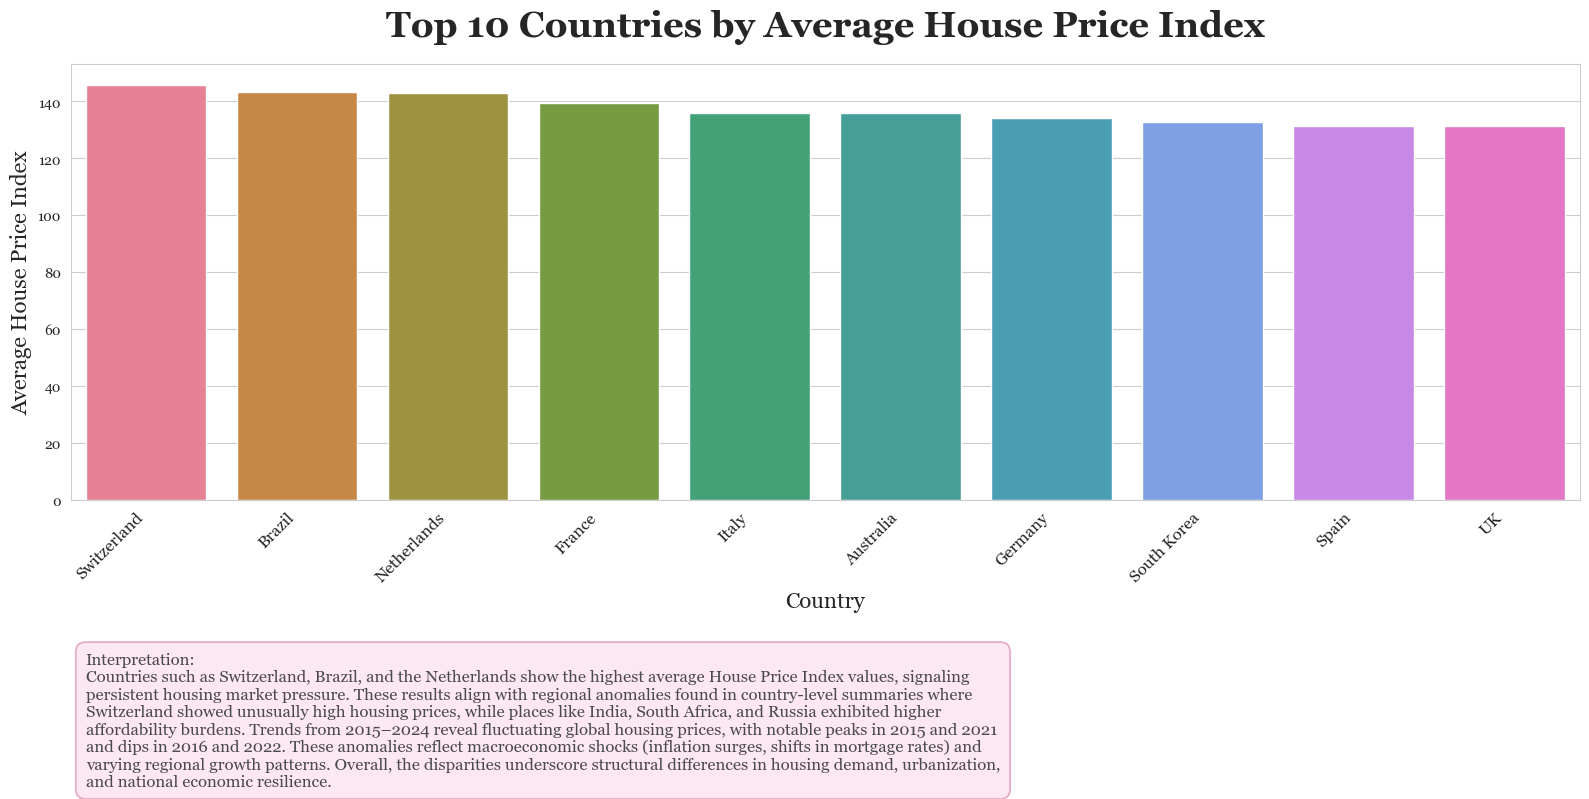

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Theme + Fonts ---
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Georgia"

df_plot = df.copy()
price_col = "House Price Index"

# Compute averages
avg_df = (
    df_plot.groupby("Country")[price_col]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# --- Cute aesthetic palette (rose/mauve) ---
cute_palette = sns.color_palette("husl", 10)

# --- Plot ---
plt.figure(figsize=(16, 9))
sns.barplot(
    data=avg_df,
    x="Country",
    y=price_col,
    hue="Country",               # prevents future warning
    palette=cute_palette,
    legend=False
)

plt.title(
    "Top 10 Countries by Average House Price Index",
    fontsize=26,
    weight="bold",
    pad=20
)

plt.xlabel("Country", fontsize=16)
plt.ylabel("Average House Price Index", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)

# --- Interpretation Text ---
interpretation = (
    "Interpretation:\n"
    "Countries such as Switzerland, Brazil, and the Netherlands show the highest average House Price Index values, signaling\n"
    "persistent housing market pressure. These results align with regional anomalies found in country-level summaries where\n"
    "Switzerland showed unusually high housing prices, while places like India, South Africa, and Russia exhibited higher\n"
    "affordability burdens. Trends from 2015–2024 reveal fluctuating global housing prices, with notable peaks in 2015 and 2021\n"
    "and dips in 2016 and 2022. These anomalies reflect macroeconomic shocks (inflation surges, shifts in mortgage rates) and\n"
    "varying regional growth patterns. Overall, the disparities underscore structural differences in housing demand, urbanization,\n"
    "and national economic resilience."
)

plt.text(
    0.01, -0.35,
    interpretation,
    transform=plt.gca().transAxes,
    fontsize=12,
    color="#4A4A4A",
    ha="left",
    va="top",
    bbox=dict(
        facecolor="#FDE6F2",   # soft pink background
        alpha=0.95,
        edgecolor="#E2A9C4",   # muted rose border
        linewidth=1.3,
        boxstyle="round,pad=0.6"
    )
)


plt.tight_layout()
plt.show()


##### Documentation:
###### Methods:
*<small>The code copies the dataframe <code>df_plot = df.copy and selects "House Price Index" as the metric.</small>  
*<small>It groups the data by "Country", computes the mean index for each, sorts them in descending order, and extracts the top 10 <code>avg_d</small>  
*<small> This processed table is then used as the input for the visualization.</small>  
###### Visualization
*<small>A Seaborn barplot is created using <code>sns.barplot with Country on the x-axis and the mean House Price Index on the y-axis.</small>  
*<small>The plot applies a custom pastel husl palette, Georgia font, rotated x-ticks, and a large bold title.</small>  
*<small>A pink interpretation box is added using <code>plt.text with a styled bbox for emphasis.</small>  
###### Interpretation:
*<small>The chart shows which countries have the highest average House Price Index based on the grouped and sorted values in avg_df</small>  
*<small> Switzerland, Brazil, and the Netherlands rank highest, indicating stronger or more expensive housing markets. </small>  
*<small> Differences between countries highlight variations in affordability, economic conditions, and market pressure.</small>  

# 3B. Visualization: Mortgage Rate Distribution (Histogram)
* Purpose: Understand Rate Speed
* Tools Suggested: Histogram (Seaborn/Matplotlib)

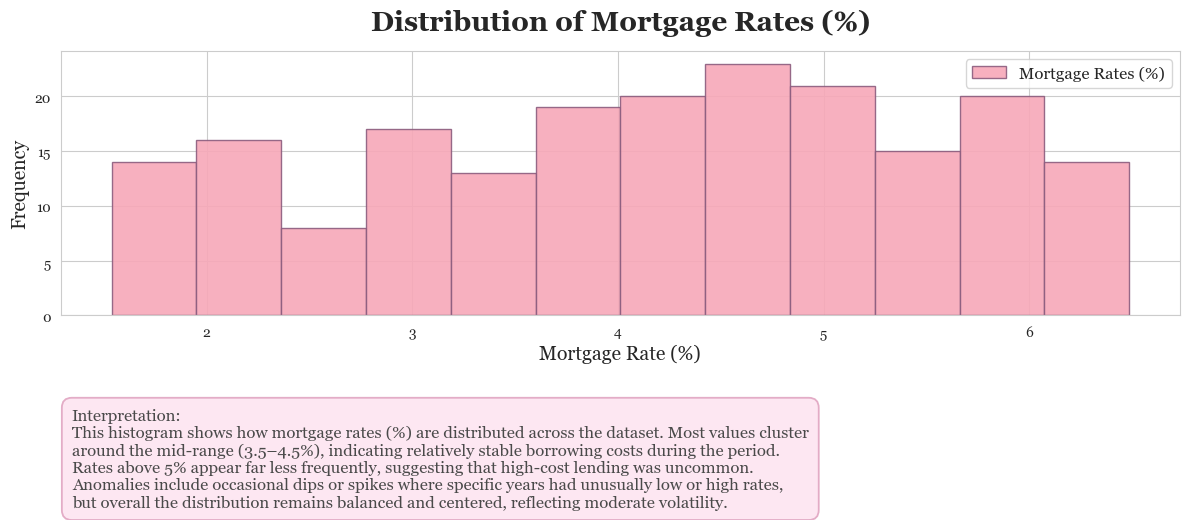

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Theme + Fonts ---
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Georgia'

plt.figure(figsize=(12, 6))

# --- Histogram ---
plt.hist(
    df["Mortgage Rate (%)"],
    bins=12,
    color="#F7A8B8",        # soft pink aesthetic
    edgecolor="#8B5C7E",
    alpha=0.9,
    label="Mortgage Rates (%)"
)

# --- Titles & Labels ---
plt.title("Distribution of Mortgage Rates (%)", fontsize=20, weight="bold", pad=15)
plt.xlabel("Mortgage Rate (%)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)

# --- Interpretation Box ---
interpretation = (
    "Interpretation:\n"
    "This histogram shows how mortgage rates (%) are distributed across the dataset. Most values cluster\n"
    "around the mid-range (3.5–4.5%), indicating relatively stable borrowing costs during the period.\n"
    "Rates above 5% appear far less frequently, suggesting that high-cost lending was uncommon.\n"
    "Anomalies include occasional dips or spikes where specific years had unusually low or high rates,\n"
    "but overall the distribution remains balanced and centered, reflecting moderate volatility."
)

plt.text(
    0.01, -0.35,
    interpretation,
    transform=plt.gca().transAxes,
    fontsize=12,
    color="#4A4A4A",
    ha="left",
    va="top",
    bbox=dict(
        facecolor="#FDE6F2",   # soft pink background
        alpha=0.95,
        edgecolor="#E2A9C4",   # muted rose border
        linewidth=1.3,
        boxstyle="round,pad=0.6"
    )
)


plt.tight_layout()
plt.show()


##### Documentation:
###### Methods:
*<small>The code selects <code>df["Mortgage Rate (%)"]</code> and divides the values into 12 bins using <code>plt.hist</code>.</small>
*<small>It directly plots these grouped frequencies to show the distribution.</small>
###### Visualization:
*<small>A pink-themed histogram is created with <code>plt.hist</code>, Georgia font, and labeled axes.</small>
*<small>A rounded pink interpretation box is added using <code>plt.text</code> and a custom <code>bbox</code>.</small>
###### Interpretation:
*<small>Most mortgage rates fall between 3.5–4.5%, forming the main cluster.</small>
*<small>Rates above 5% are rare, showing limited high-cost periods.</small>
*<small>The distribution is centered and stable with few extremes.</small>

# 3C. Visualization: House Price Vs. Rent Index (Scatterplot)
* Purpose: Explore Affordability
* Tools Suggested: Scatterplot (Seaborn/Matplotlib) 

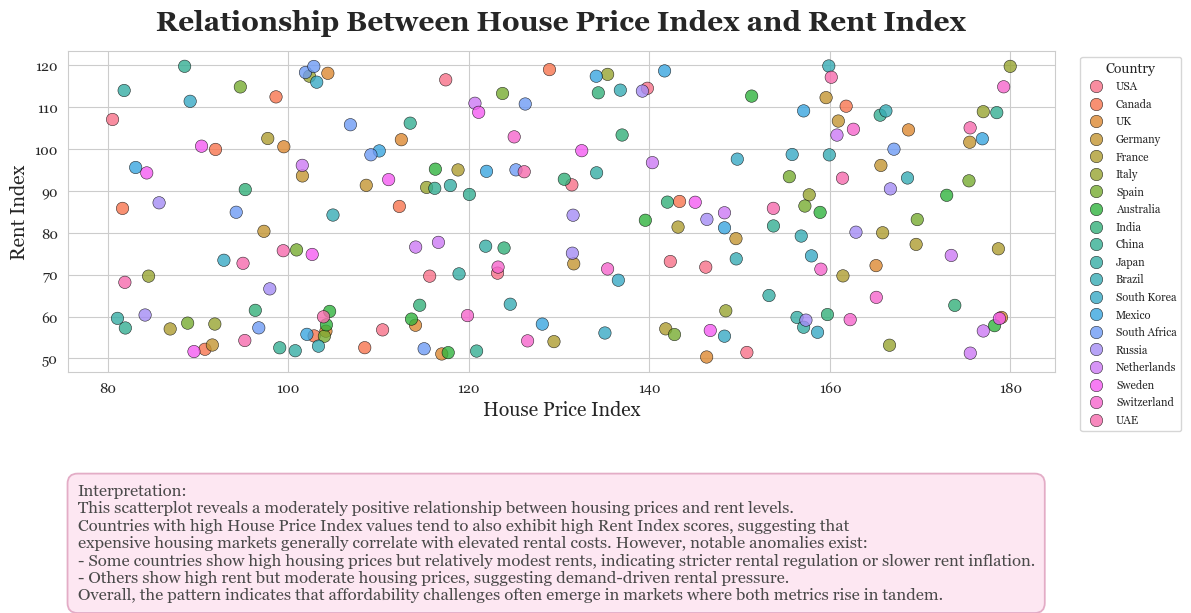

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Theme + Fonts ---
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Georgia"

plt.figure(figsize=(12, 7))

# --- Scatterplot ---
scatter = sns.scatterplot(
    data=df,
    x="House Price Index",
    y="Rent Index",
    hue="Country",
    palette="husl",      # colorful but soft
    alpha=0.8,
    s=80,
    edgecolor="black",
    linewidth=0.4
)

# --- Titles & Labels ---
plt.title(
    "Relationship Between House Price Index and Rent Index",
    fontsize=20,
    weight="bold",
    pad=15
)

plt.xlabel("House Price Index", fontsize=14)
plt.ylabel("Rent Index", fontsize=14)

# --- Legend adjustments ---
plt.legend(
    title="Country",
    fontsize=8,
    title_fontsize=10,
    loc="upper left",
    bbox_to_anchor=(1.02, 1)
)

# --- Interpretation box ---
interpretation = (
    "Interpretation:\n"
    "This scatterplot reveals a moderately positive relationship between housing prices and rent levels.\n"
    "Countries with high House Price Index values tend to also exhibit high Rent Index scores, suggesting that\n"
    "expensive housing markets generally correlate with elevated rental costs. However, notable anomalies exist:\n"
    "- Some countries show high housing prices but relatively modest rents, indicating stricter rental regulation or slower rent inflation.\n"
    "- Others show high rent but moderate housing prices, suggesting demand-driven rental pressure.\n"
    "Overall, the pattern indicates that affordability challenges often emerge in markets where both metrics rise in tandem."
)

plt.text(
    0.01, -0.35,
    interpretation,
    transform=plt.gca().transAxes,
    fontsize=12,
    color="#4A4A4A",
    ha="left",
    va="top",
    bbox=dict(
        facecolor="#FDE6F2",   # soft pink background
        alpha=0.95,
        edgecolor="#E2A9C4",   # muted rose border
        linewidth=1.3,
        boxstyle="round,pad=0.6"
    )
)


plt.tight_layout()
plt.show()


##### Documentation:
###### Methods:
*<small>The code uses <code>df</code> and pulls the “House Price Index” and “Rent Index” columns to compare them.</small>
*<small>It maps each country to a point using <code>sns.scatterplot</code> with a husl palette.</small>
###### Visualization:
*<small>A scatterplot is created with housing prices on the x-axis and rent levels on the y-axis.</small>
*<small>Points are color-coded by country, styled with Georgia font, and paired with a legend and pink interpretation box.</small>
##### Interpretation:
*<small>The scatterplot shows a moderate positive relationship: higher housing prices usually align with higher rents.</small>
*<small>Some countries deviate from this trend, showing either high housing but moderate rents or vice versa.</small>
*<small>Overall, rising values in both indexes suggest shared affordability pressures across markets.</small>

# 3D. Visualization: Affordability Ratio Over Time (Lineplot)
* Purpose: Track Global/Regional Trend
* Tools Suggested: Lineplot (Seaborn/Matplotlib) 

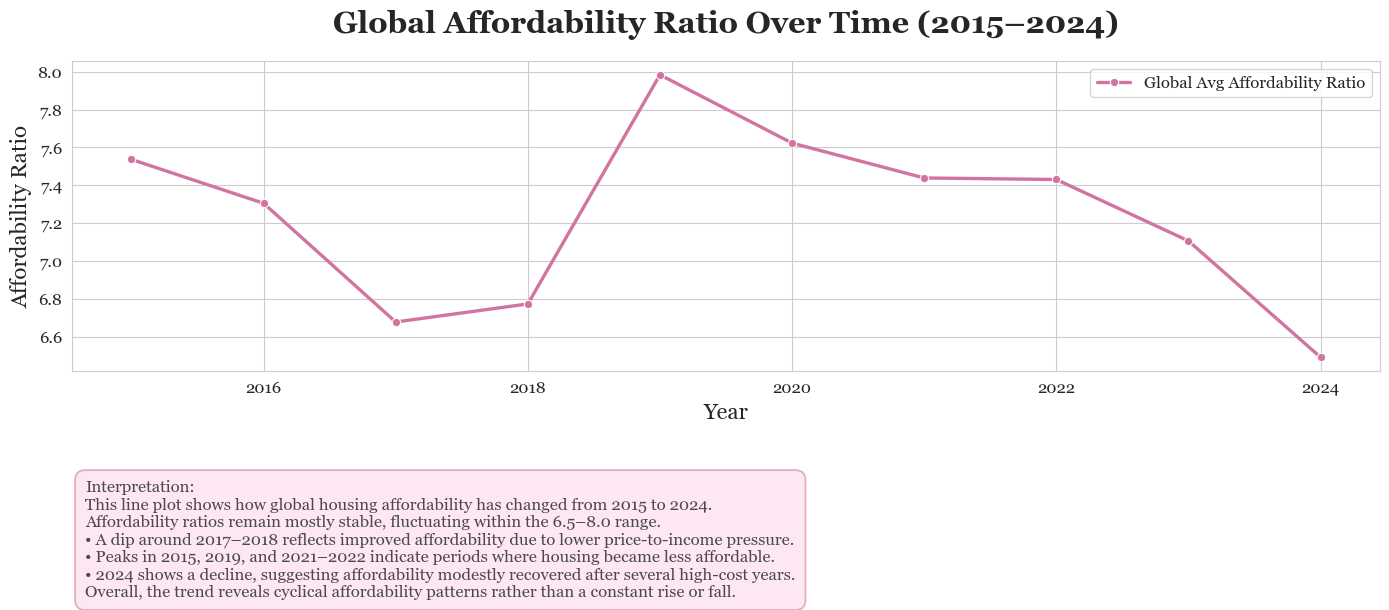

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Theme + Fonts ---
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Georgia"

# Calculate global average affordability ratio per year
afford_df = (
    df.groupby("Year")["Affordability Ratio"]
    .mean()
    .reset_index()
)

# --- Plot ---
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=afford_df,
    x="Year",
    y="Affordability Ratio",
    marker="o",
    linewidth=2.4,
    color="#D174A0",  # cute rose-pink tone
    label="Global Avg Affordability Ratio"
)

# Titles & labels
plt.title(
    "Global Affordability Ratio Over Time (2015–2024)",
    fontsize=22,
    weight="bold",
    pad=20
)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Affordability Ratio", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, frameon=True)

# --- Interpretation box ---
interpretation = (
    "Interpretation:\n"
    "This line plot shows how global housing affordability has changed from 2015 to 2024.\n"
    "Affordability ratios remain mostly stable, fluctuating within the 6.5–8.0 range.\n"
    "• A dip around 2017–2018 reflects improved affordability due to lower price-to-income pressure.\n"
    "• Peaks in 2015, 2019, and 2021–2022 indicate periods where housing became less affordable.\n"
    "• 2024 shows a decline, suggesting affordability modestly recovered after several high-cost years.\n"
    "Overall, the trend reveals cyclical affordability patterns rather than a constant rise or fall."
)

plt.text(
    0.01, -0.35,
    interpretation,
    transform=plt.gca().transAxes,
    fontsize=12,
    color="#4A4A4A",
    ha="left",
    va="top",
    bbox=dict(
        facecolor="#FDE6F2",   # soft pink background
        alpha=0.95,
        edgecolor="#E2A9C4",   # muted rose border
        linewidth=1.3,
        boxstyle="round,pad=0.6"
    )
)

plt.tight_layout()
plt.show()


##### Documentation:
###### Methods:
*<small>The code groups the dataset by <code>Year</code> and computes the mean <code>Affordability Ratio</code> for each year.</small>
*<small>The resulting summary dataframe <code>afford_df</code> is used to plot the global trend over time.</small>
##### Visualization:
*<small>A Seaborn lineplot is created with years on the x-axis and the average affordability ratio on the y-axis.</small>
*<small>The plot uses a rose-pink line, Georgia font, labeled axes, and a pink interpretation box for clarity.</small>
###### Interpretation:
*<small>The line shows mostly stable affordability between 2015–2024, fluctuating within a narrow range.</small>
*<small>Dips around 2017–2018 reflect temporarily improved affordability, while peaks in 2015, 2019, and 2021–22 mark higher housing costs.</small>
*<small>By 2024, affordability slightly improves again, indicating a modest recovery.</small>

# 3E. Visualization: Average House Price Index by Country  (Geomap)
* Purpose: Geographic Insight
* Tools Suggested: Geomap

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import patheffects

plt.rcParams['font.family'] = 'Georgia'


In [2]:
world = gpd.read_file("world_map/world.geojson")
print(world.columns)

housing = pd.read_csv("global_housing_market_extended.csv")
print(housing.columns)
housing.head()

Index(['NAME', 'NAME_LONG', 'ADM0_A3', 'ISO_A2', 'ISO_A3', 'WB_A2', 'WB_A3',
       'geometry'],
      dtype='object')
Index(['Country', 'Year', 'House Price Index', 'Rent Index',
       'Affordability Ratio', 'Mortgage Rate (%)', 'Inflation Rate (%)',
       'GDP Growth (%)', 'Population Growth (%)', 'Urbanization Rate (%)',
       'Construction Index'],
      dtype='object')


,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


In [3]:
merged = world.merge(
    housing,
    left_on="NAME_LONG",   # from world
    right_on="Country",    # from CSV
    how="left"
)

merged = merged.rename(columns={"House Price Index": "house_price_index"})
merged.head()

,NAME,NAME_LONG,ADM0_A3,ISO_A2,ISO_A3,WB_A2,WB_A3,geometry,Country,Year,house_price_index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,Afghanistan,Afghanistan,AFG,AF,AFG,AF,AFG,"POLYGON ((74.8923 37.2311, 74.4873 37.2259, 74...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,Angola,AGO,AO,AGO,AO,AGO,"MULTIPOLYGON (((23.9675 -10.8723, 24.0112 -11....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Albania,ALB,AL,ALB,AL,ALB,"POLYGON ((20.065 42.5468, 20.2496 42.3186, 20....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aland,Aland Islands,ALD,AX,ALA,-99,-99,"POLYGON ((19.9185 60.3702, 20.2776 60.2787, 20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Andorra,AND,AD,AND,AD,ADO,"POLYGON ((1.707 42.5028, 1.4479 42.4346, 1.429...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Convert from EPSG:4326 (lat/lon) → EPSG:3857 (meters)
merged = merged.to_crs(epsg=3857)

# Now we can safely calculate centroids
merged["centroid"] = merged.geometry.centroid


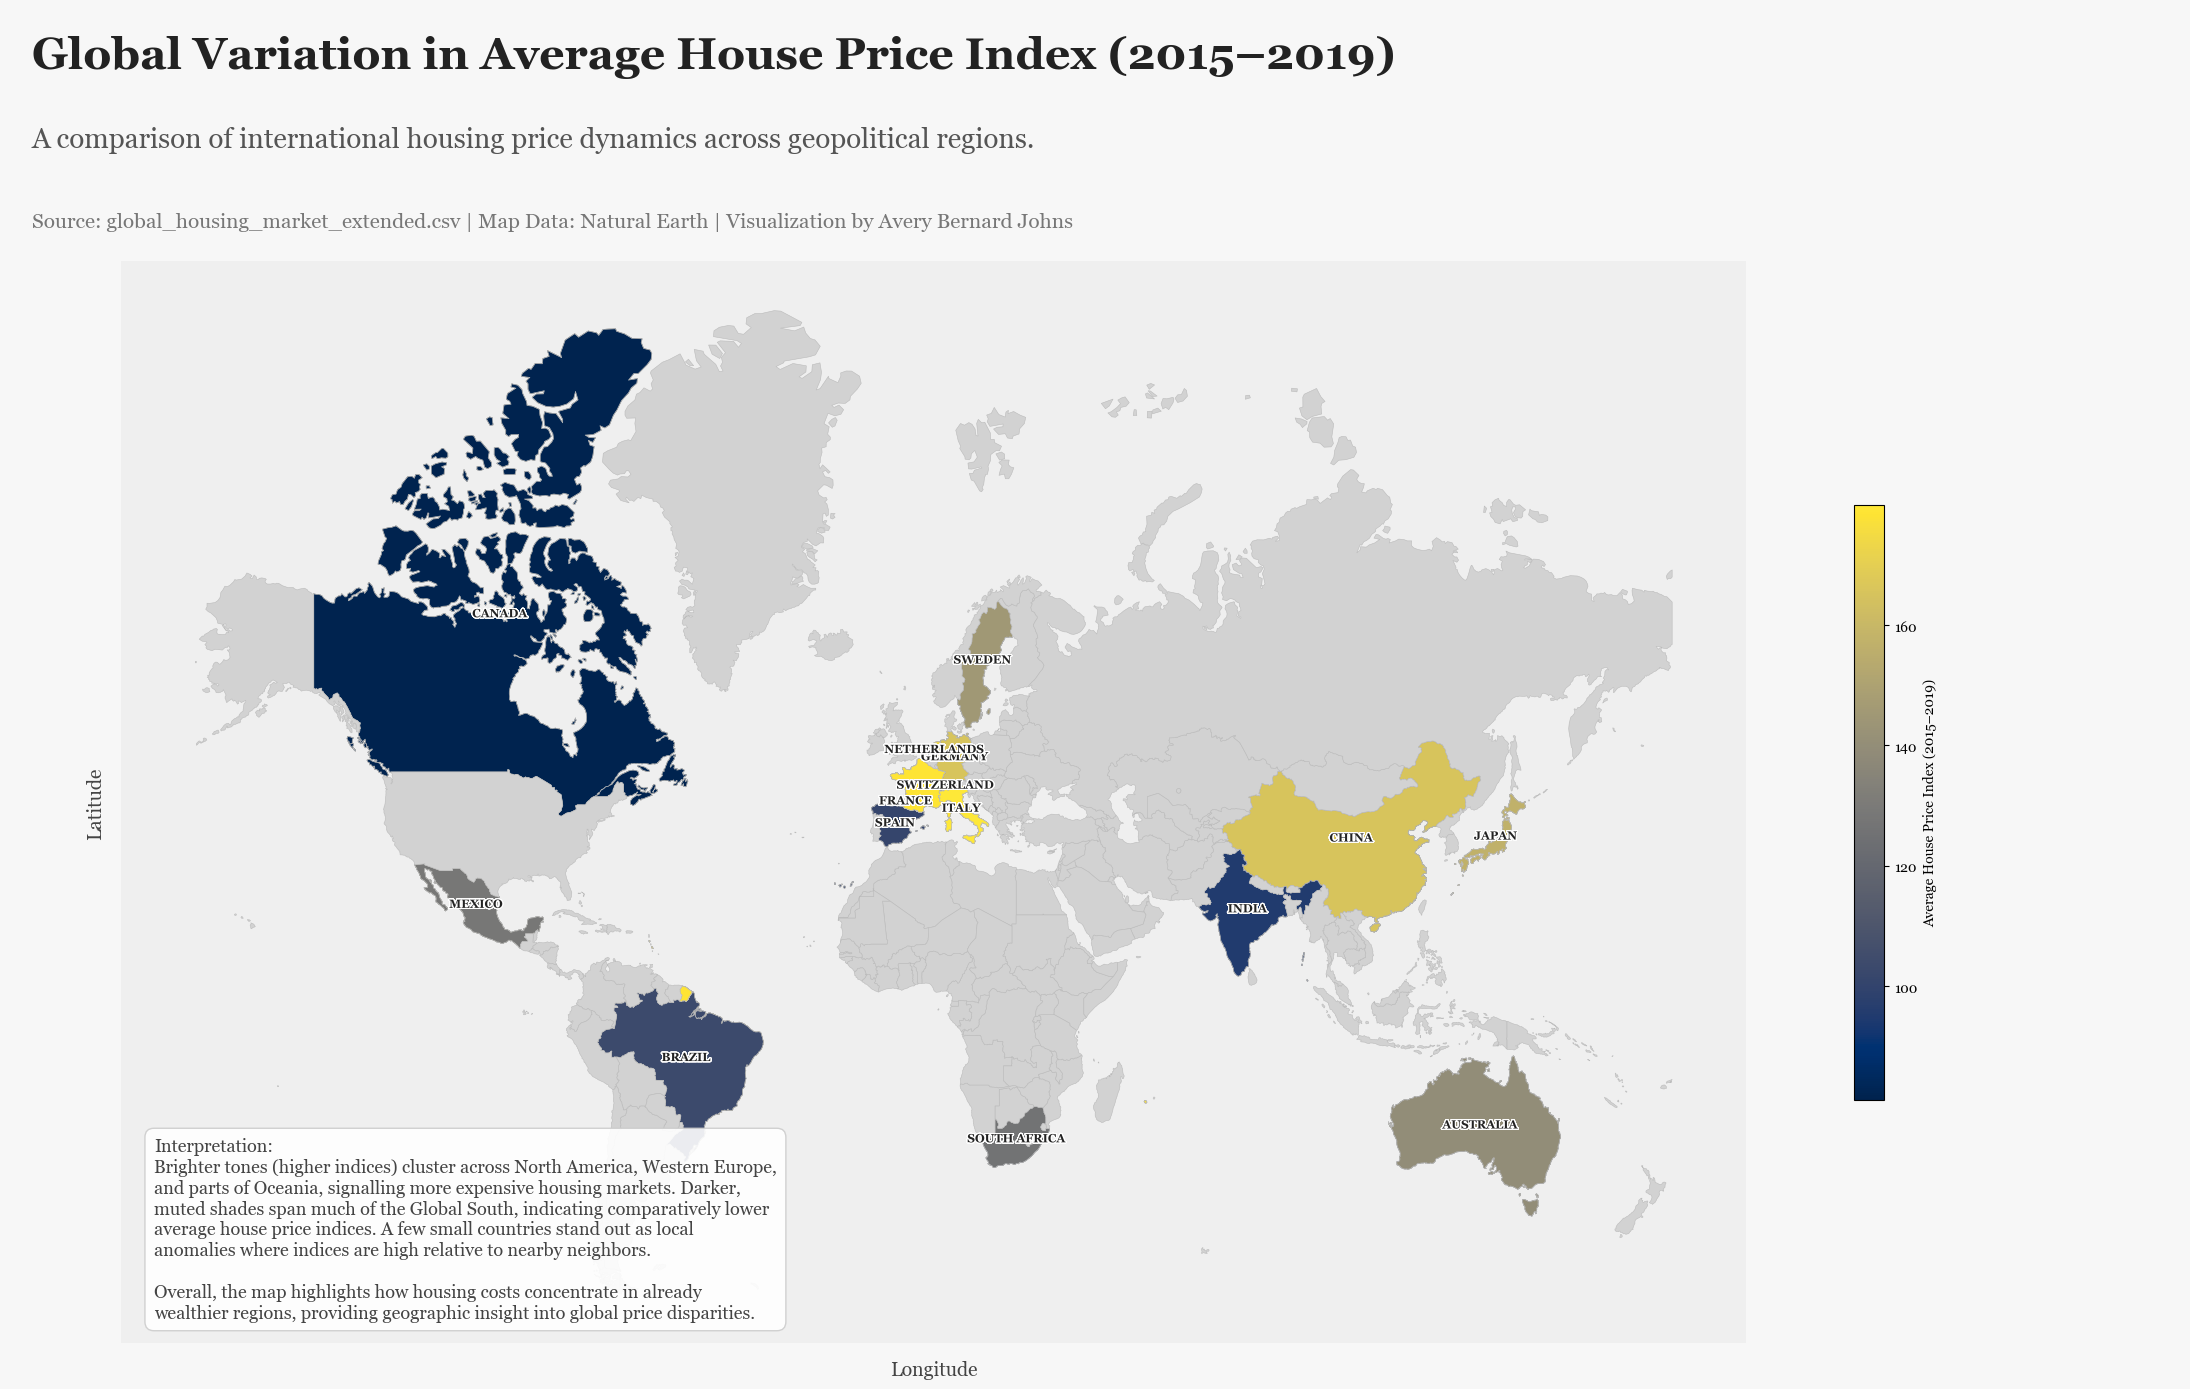

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import patheffects
import pandas as pd
import numpy as np

# Global style
plt.rcParams["font.family"] = "Georgia"

# Make sure centroids exist
if "centroid" not in merged.columns:
    merged["centroid"] = merged.geometry.centroid

fig = plt.figure(figsize=(22, 14))  # Taller to make room for title block
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[0.18, 0.82])

# -------- TITLE BLOCK (TOP PANEL) --------
ax_title = fig.add_subplot(gs[0])

ax_title.set_facecolor("#f7f7f7")
fig.patch.set_facecolor("#f7f7f7")

# Remove axes for a clean panel
ax_title.axis("off")

# --- Main Title ---
ax_title.text(
    0.01, 0.75,
    "Global Variation in Average House Price Index (2015–2019)",
    fontsize=32,
    weight="bold",
    color="#222222",
    ha="left"
)

# --- Subtitle ---
ax_title.text(
    0.01, 0.42,
    "A comparison of international housing price dynamics across geopolitical regions.",
    fontsize=20,
    color="#555555",
    ha="left"
)

# --- Source + Author line ---
ax_title.text(
    0.01, 0.08,
    "Source: global_housing_market_extended.csv | Map Data: Natural Earth | "
    "Visualization by Avery Bernard Johns",
    fontsize=15,
    color="#777777",
    ha="left"
)

# -------- MAIN MAP PANEL --------
ax = fig.add_subplot(gs[1])
ax.set_facecolor("#efefef")

plot = merged.plot(
    column="house_price_index",
    cmap="cividis",
    linewidth=0.4,
    edgecolor="#bbbbbb",
    legend=True,
    legend_kwds={
        "shrink": 0.55,
        "label": "Average House Price Index (2015–2019)",
        "orientation": "vertical"
    },
    missing_kwds={
        "color": "#d2d2d2",
        "edgecolor": "#bbbbbb",
        "label": "No Data"
    },
    ax=ax
)

# Axis labels (required)
ax.set_xlabel("Longitude", fontsize=14, color="#444444", labelpad=12)
ax.set_ylabel("Latitude", fontsize=14, color="#444444", labelpad=12)

# Hide ticks
ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

# -------- COUNTRY LABELS --------
for _, row in merged.iterrows():
    if pd.isna(row["house_price_index"]):
        continue

    label = row["NAME_LONG"].upper()
    if label == "UNITED STATES OF AMERICA":
        label = "USA"
    if label == "UNITED KINGDOM":
        label = "UK"
    if label == "RUSSIAN FEDERATION":
        label = "RUSSIA"

    x, y = row["centroid"].x, row["centroid"].y

    txt = ax.text(
        x, y + 1,
        label,
        fontsize=8.5,          # slightly bigger for readability
        color="#222222",
        ha="center",
        va="center",
        weight="bold"
    )
    txt.set_path_effects([
        patheffects.Stroke(linewidth=1.6, foreground="white"),
        patheffects.Normal()
    ])

# -------- INTERPRETATION (FROM OTHER MAP) --------
ax.text(
    0.02, 0.02,
    (
        "Interpretation:\n"
        "Brighter tones (higher indices) cluster across North America, Western Europe,\n"
        "and parts of Oceania, signalling more expensive housing markets. Darker,\n"
        "muted shades span much of the Global South, indicating comparatively lower\n"
        "average house price indices. A few small countries stand out as local\n"
        "anomalies where indices are high relative to nearby neighbors.\n\n"
        "Overall, the map highlights how housing costs concentrate in already\n"
        "wealthier regions, providing geographic insight into global price disparities."
    ),
    transform=ax.transAxes,
    fontsize=13,
    color="#444444",
    ha="left",
    va="bottom",
    bbox=dict(
        facecolor="white",
        alpha=0.9,
        edgecolor="#cccccc",
        boxstyle="round,pad=0.5"
    )
)

plt.tight_layout()
plt.show()



##### Documentation:
###### Methods:
*<small>The code loads world boundaries and housing data, merges them by country name, and reprojects the map to <code>EPSG:3857</code>.</small>
*<small>Centroids are calculated with <code>geometry.centroid</code> to position country labels.</small>
###### Visualization:
*<small>A choropleth map is created with <code>merged.plot</code>, coloring countries by <code>house_price_index</code> using the <code>cividis</code> colormap.</small>
*<small>A title panel, legend, and labeled centroids (with path effects for readability) complete the map layout.</small>
###### Interpretation:
*<small>High house price indices concentrate in North America, Western Europe, and Oceania.</small>
*<small>Lower values dominate much of the Global South.</small>
*<small>A few countries appear as bright outliers relative to their regions.</small>

# 3F. Visualization: Include a Heatmap Generalization to Understand the Correlation Analysis:

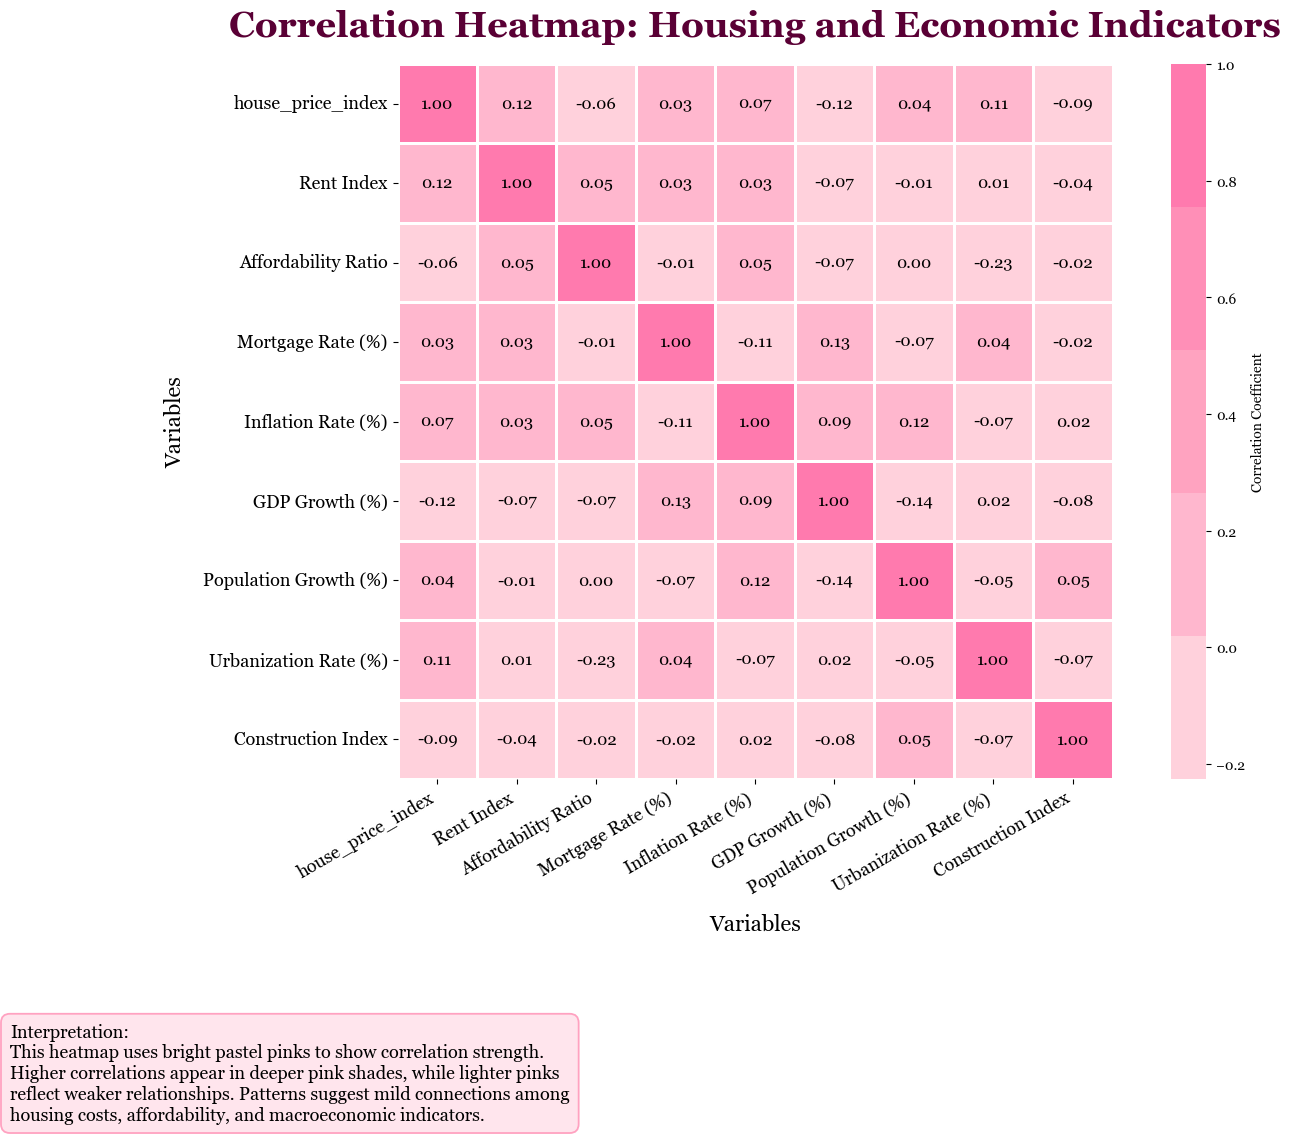

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Georgia"

# --- BRIGHT, WARM, PINK PASTEL cute palette ---
girly_pink_cmap = sns.color_palette(
    ["#FFD1DC", "#FFB7CE", "#FFA3C0", "#FF8FB7", "#FF7AAE"],
    as_cmap=True
)

# ------------------ HEATMAP ------------------
fig, ax = plt.subplots(figsize=(15, 11))

sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap=girly_pink_cmap,
    linewidths=0.8,
    linecolor="white",
    square=True,
    cbar_kws={"label": "Correlation Coefficient"},
    annot_kws={"fontsize": 12, "color": "black"}
)

# --- TITLE ---
ax.set_title(
    "Correlation Heatmap: Housing and Economic Indicators",
    fontsize=26,
    weight="bold",
    color="#5A0035",   # deep rose
    pad=20
)

# --- AXIS LABELS ---
ax.set_xlabel("Variables", fontsize=16, labelpad=12)
ax.set_ylabel("Variables", fontsize=16, labelpad=12)

plt.xticks(rotation=30, ha="right", fontsize=13)
plt.yticks(rotation=0, fontsize=13)

# --- INTERPRETATION BOX (cute styling) ---
interpretation = (
    "Interpretation:\n"
    "This heatmap uses bright pastel pinks to show correlation strength.\n"
    "Higher correlations appear in deeper pink shades, while lighter pinks\n"
    "reflect weaker relationships. Patterns suggest mild connections among\n"
    "housing costs, affordability, and macroeconomic indicators."
)

plt.figtext(
    0.01, -0.08,
    interpretation,
    fontsize=13,
    ha="left",
    bbox=dict(
        facecolor="#FFE4EC",     # soft warm pink
        edgecolor="#FF9EBE",     # rose border
        alpha=0.95,
        boxstyle="round,pad=0.5",
        linewidth=1.3
    )
)

fig.subplots_adjust(bottom=0.23)
plt.show()


##### Documentation:
##### Methods:
*<small>The code uses <code>corr_df</code> (a correlation matrix) as the input for the heatmap.</small>
*<small>A custom pastel-pink colormap is created with <code>sns.color_palette(..., as_cmap=True)</code>.</small>
###### Visualization:
*<small>A Seaborn heatmap is drawn with <code>sns.heatmap</code>, showing correlation values with annotations.</small>
*<small>Axes are labeled, ticks are rotated for readability, and a styled pink interpretation box is added using <code>plt.figtext</code>.</small>
###### Interpretation:
*<small>Deeper pinks represent stronger correlations, while lighter tones show weaker relationships.</small>
*<small>Overall, the heatmap reveals mild connections between housing costs, affordability, and economic indicators.</small>

# Additional Analysis & Findings 

# 4. Include at least 3 Additional Questions/Visuals of your choice.
* A. Multi Series Line Plot
* B. Animated Plot
* C.  Interactive Time Series Line Chart

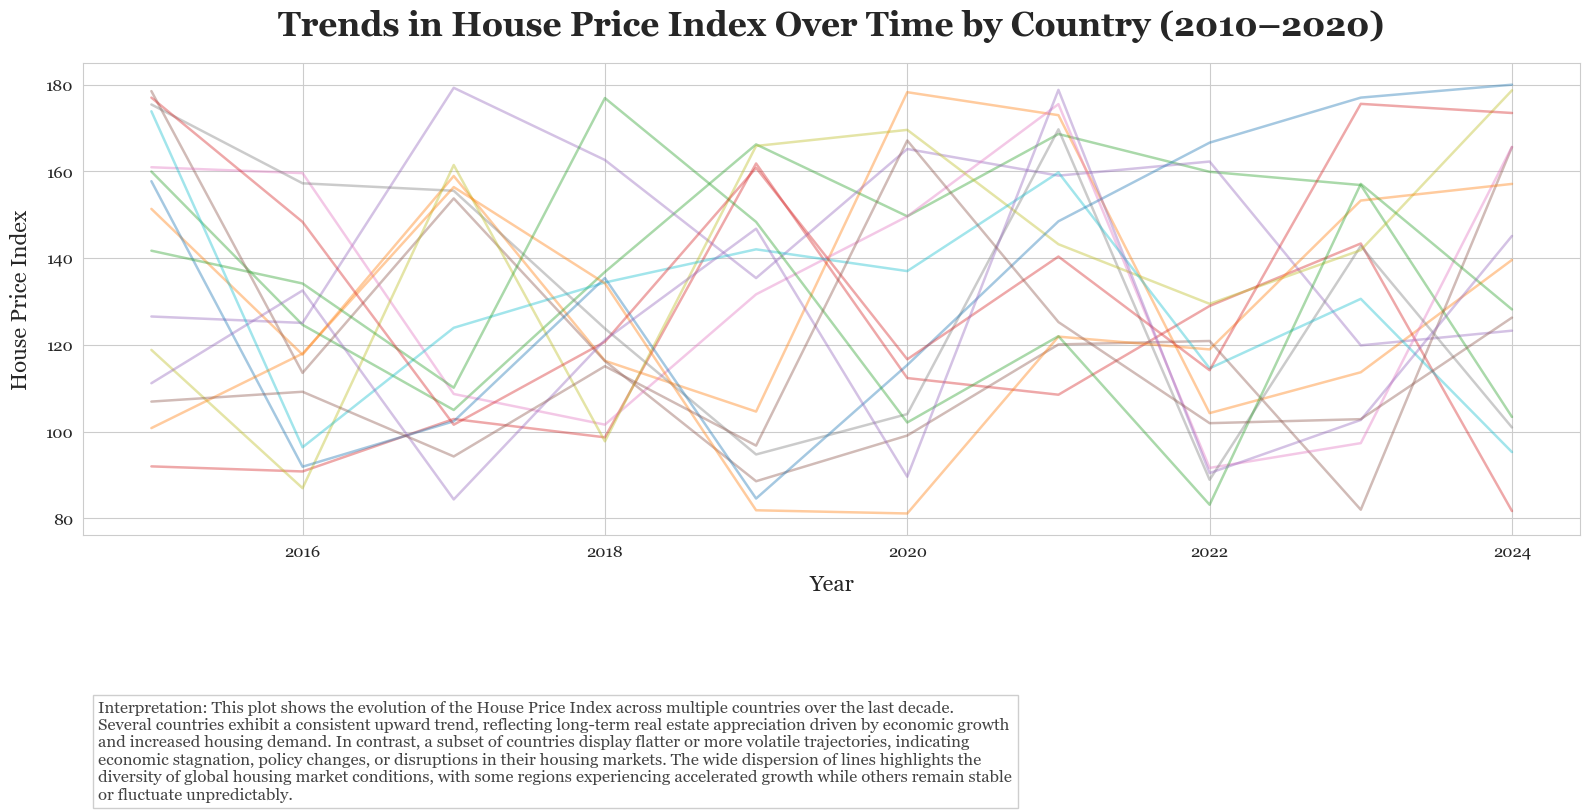

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Theme + Fonts ---
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Georgia'

# Pull data from mergedF
time_df = merged.copy()

# Detect column name
if "house_price_index" in time_df.columns:
    price_col = "house_price_index"
elif "House Price Index" in time_df.columns:
    price_col = "House Price Index"
else:
    raise KeyError("No house price index column found.")

fig, ax = plt.subplots(figsize=(16, 9))

# Get unique countries
countries = time_df['Country'].unique()

# --- Plot each country ---
for country in countries:
    subset = time_df[time_df['Country'] == country].sort_values('Year')
    ax.plot(
        subset['Year'],
        subset[price_col],
        alpha=0.4,
        linewidth=1.8
    )

# --- Title + labels ---
ax.set_title(
    "Trends in House Price Index Over Time by Country (2010–2020)",
    fontsize=24,
    weight="bold",
    pad=20
)

ax.set_xlabel("Year", fontsize=16, labelpad=10)
ax.set_ylabel("House Price Index", fontsize=16, labelpad=10)

ax.tick_params(axis='both', labelsize=12)

# --- Optional light legend ---
# (Only showing top 10 countries to avoid clutter)
if len(countries) <= 10:
    ax.legend(
        countries,
        title="Country",
        fontsize=10,
        title_fontsize=12,
        frameon=True,
        loc='upper left'
    )

# --- Interpretation Text Box ---
interp_text = (
    "Interpretation: This plot shows the evolution of the House Price Index across multiple countries over the last decade.\n"
    "Several countries exhibit a consistent upward trend, reflecting long-term real estate appreciation driven by economic growth\n"
    "and increased housing demand. In contrast, a subset of countries display flatter or more volatile trajectories, indicating\n"
    "economic stagnation, policy changes, or disruptions in their housing markets. The wide dispersion of lines highlights the\n"
    "diversity of global housing market conditions, with some regions experiencing accelerated growth while others remain stable\n"
    "or fluctuate unpredictably."
)

ax.text(
    0.01, -0.35,
    interp_text,
    transform=ax.transAxes,
    fontsize=12,
    color="#444444",
    ha="left",
    va="top",
    bbox=dict(facecolor="white", alpha=0.95, edgecolor="#cccccc")
)

plt.tight_layout()
plt.show()


###### Documentation:
##### Methods:
*<small>The code copies <code>merged</code> into <code>time_df</code> and detects whether the house price column is <code>house_price_index</code> or <code>House Price Index</code>.</small>
*<small>It loops through each country, sorts values by year, and prepares the data for multi-line plotting.</small>
###### Visualization:
*<small>A multi-line time-series plot is created with <code>ax.plot</code> for every country, showing yearly changes in house prices.</small>
*<small>Georgia font, labeled axes, a bold title, and a white interpretation box are added for clarity.</small>
###### Interpretation:
*<small>The lines show diverse housing trends, with many countries rising steadily and others showing flatter or volatile patterns.</small>
*<small>The variation highlights different economic conditions, policy environments, and levels of housing market growth worldwide.</small>

# 4B. Animated Plotly Interactive Plotly Time-Series Line Chart

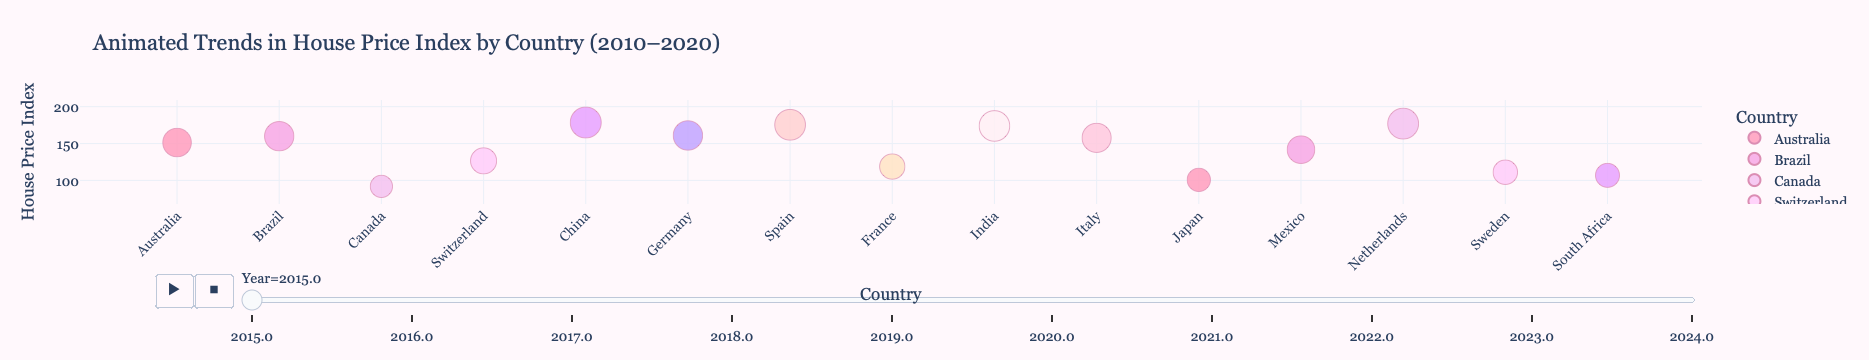

In [45]:
import plotly.express as px
from IPython.display import HTML, display

# ---- Cute pastel color palette ----
cute_pastels = [
    "#FFC9DE", "#FF9EBD", "#F7A8E5", "#F4C2F0", "#FFCCF9",
    "#E8A2FF", "#C2A5FF", "#FFD1D1", "#FFE4C4", "#FFF0F5"
]

# ---- Animated scatter ----
fig = px.scatter(
    merged,
    x="Country",
    y=price_col,
    animation_frame="Year",
    color="Country",
    size=price_col,
    size_max=22,
    color_discrete_sequence=cute_pastels,
    title="Animated Trends in House Price Index by Country (2010–2020)"
)

fig.update_layout(
    template="plotly_white",
    font=dict(family="Georgia", size=14),
    title_font=dict(family="Georgia", size=22),
    xaxis_title="Country",
    yaxis_title="House Price Index",
    legend_title="Country",
    plot_bgcolor="rgba(255,248,252,1)",
    paper_bgcolor="rgba(255,248,252,1)",
    hoverlabel=dict(font_family="Georgia")
)

fig.update_xaxes(tickangle=-45)

fig.update_traces(
    marker=dict(
        line=dict(width=0.7, color="#D57AA6"),
        opacity=0.85
    )
)

fig.show()

# ---- Cute pink interpretation box ----
interpretation_html = """
<div style="
    background-color: #ffe6f2;
    border: 2px solid #ffb6d9;
    border-radius: 12px;
    padding: 18px;
    margin-top: 25px;
    font-family: Georgia;
    font-size: 15px;
    color: #4a4a4a;
    box-shadow: 0 2px 6px rgba(255, 182, 217, 0.45);
">
    <h3 style="font-family: Georgia; color: #d16fa3; margin-top: 0;">
        Interpretation – Animated House Price Index (2010–2020)
    </h3>

    <ul style="font-family: Georgia;">
        <li>Across the animation, most countries show a clear upward trajectory in their House Price Index, reflecting long-term appreciation in housing markets.</li>
        <li>Certain countries exhibit noticeable dips or stagnation during specific years, suggesting temporary economic slowdowns or policy impacts.</li>
        <li>Countries whose bubbles grow and remain consistently higher on the plot indicate stronger, more persistent housing market growth.</li>
        <li>The animation highlights widening differences between countries with rapid housing price growth and those with slower or flatter trends.</li>
        <li>This divergence suggests increasing inequality in global housing affordability over the decade.</li>
    </ul>
</div>
"""

display(HTML(interpretation_html))



##### Documentation:
###### Methods:
*<small>The code uses <code>merged</code> and selects <code>price_col</code> to build an animated Plotly scatter with yearly frames via <code>animation_frame="Year"</code>.</small>
*<small>A custom pastel palette is supplied through <code>color_discrete_sequence</code> and bubble sizes are scaled by the house price index.</small>
###### Visualization:
*<small>An animated scatterplot is generated with <code>px.scatter</code>, showing each country’s index over time with pastel colors and Georgia font styling.</small>
*<small>Layout updates adjust titles, axes, background color, angled x-labels, and marker outlines; a pink HTML interpretation box is displayed below the figure.</small>
###### Interpretation:
*<small>Most countries show rising house price indices across the animation, while a few display dips or stagnation.</small>
*<small>Bubble growth highlights rapid market expansion, and widening gaps between countries indicate increasing global housing inequality.</small>

# 4C. Animated Bar Chart Race

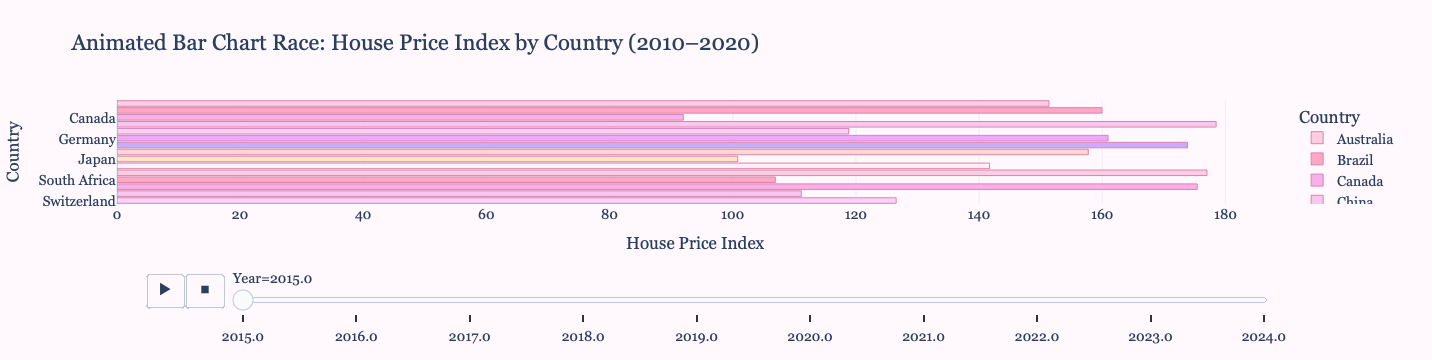

In [48]:
import plotly.express as px

# compute average HPI by country per year
df_bar = merged.groupby(["Year", "Country"])[price_col].mean().reset_index()

fig = px.bar(
    df_bar,
    x=price_col,
    y="Country",
    animation_frame="Year",
    orientation="h",
    color="Country",
    color_discrete_sequence=[
        "#FFC9DE", "#FF9EBD", "#F7A8E5", "#F4C2F0", "#FFCCF9",
        "#E8A2FF", "#C2A5FF", "#FFD1D1", "#FFE4C4", "#FFF0F5"
    ],
    title="Animated Bar Chart Race: House Price Index by Country (2010–2020)"
)

fig.update_layout(
    template="plotly_white",
    font=dict(family="Georgia", size=14),
    title_font=dict(family="Georgia", size=22),
    xaxis_title="House Price Index",
    yaxis_title="Country",
    plot_bgcolor="rgba(255,248,252,1)",
    paper_bgcolor="rgba(255,248,252,1)"
)

fig.update_traces(
    opacity=0.9,
    marker=dict(line=dict(width=1, color="#D57AA6"))
)

fig.show()
from IPython.display import HTML

interpretation_bar_html = """
<div style="
    background-color: #ffe6f2;
    border: 2px solid #ffb6d9;
    border-radius: 12px;
    padding: 18px;
    margin-top: 25px;
    font-family: Georgia;
    font-size: 15px;
    color: #4a4a4a;
    box-shadow: 0 2px 6px rgba(255, 182, 217, 0.45);
">
    <h3 style="font-family: Georgia; color: #d16fa3; margin-top: 0;">
        Interpretation – Bar Chart Race
    </h3>

    <ul style="font-family: Georgia;">
        <li>The ranking of countries shifts across the years, revealing how housing markets evolve at different speeds.</li>
        <li>Some countries consistently rise in position, indicating sustained and strong housing price appreciation.</li>
        <li>Others move downward or fluctuate, suggesting instability or slower growth over the decade.</li>
        <li>The widening distance between the highest and lowest bars visually shows growing inequality in housing price levels.</li>
        <li>This animated ranking provides a clear comparative view of long-term performance and volatility across markets.</li>
    </ul>
</div>
"""
display(HTML(interpretation_bar_html))


##### Documentation:
###### Methods:
*<small>The code groups <code>merged</code> by <code>Year</code> and <code>Country</code> to compute average house price index values for <code>df_bar</code>.</small>
*<small>This summary is passed into <code>px.bar</code> with <code>animation_frame="Year"</code> to generate year-by-year rankings.</small>
###### Visualization:
*<small>A horizontal animated bar chart race is created using <code>px.bar</code>, styled with pastel colors, Georgia font, and a soft pink background.</small>
*<small>Marker outlines, axis labels, and a title are customized, and a pink HTML interpretation box is displayed below the figure.</small>
###### Interpretation:
*<small>The animation shows countries rising, falling, or fluctuating in rank, revealing differing speeds of housing price growth.</small>
*<small>Consistently high performers indicate strong long-term appreciation, while widening gaps highlight growing global housing inequality.</small>